In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## parameters

## read data

In [2]:
trips = pd.read_csv('data//From_Via_To.csv')
del trips['Unnamed: 0']

trips.head()

,Z_Rejon,POI,Do_Rejon,Czas_PuT,Czas_PrT
0,1.0,1.0,1.0,2283.617262,520.275425
1,1.0,1.0,2.0,2221.617262,654.818713
2,1.0,1.0,3.0,2221.617262,636.818713
3,1.0,1.0,4.0,2504.617262,667.213714
4,1.0,1.0,5.0,3013.617262,785.481611


## analyze

In [3]:
trips[['Czas_PuT','Czas_PrT']].describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95])
BUDGET_PRT = trips['Czas_PrT'].quantile(0.5)
BUDGET_PUT = trips['Czas_PuT'].quantile(0.5)
trips['time_left_PrT']=BUDGET_PRT - trips.Czas_PrT
trips['time_left_PuT']=BUDGET_PUT - trips.Czas_PuT
pd.options.display.float_format = '{:,.0f}'.format

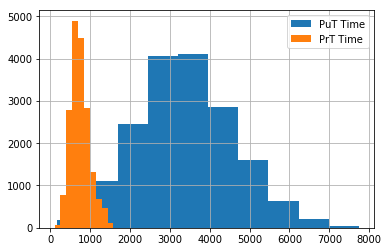

In [4]:
fig, ax = plt.subplots()
trips.Czas_PuT[trips.Czas_PuT<trips.Czas_PuT.quantile(0.95)].hist(label = 'PuT Time')
trips.Czas_PrT.hist(label='PrT Time')
plt.legend()
plt.show()

## create matrix

In [5]:
matrix = trips.groupby(by=['Z_Rejon', 'Do_Rejon']) 
matrix_PrT = trips[trips.Czas_PrT<BUDGET_PRT].groupby(by=['Z_Rejon', 'Do_Rejon']) 
matrix_PuT = trips[trips.Czas_PuT<BUDGET_PUT].groupby(by=['Z_Rejon', 'Do_Rejon']) 

# number of POIs in budget per OD pair 

In [6]:
matrix_PrT.size().unstack().fillna(0)

Do_Rejon,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0
Z_Rejon,,,,,,,,,,,,,,,,,,,,,
1,21,26,26,26,20,21,18,20,18,20,...,20,19,20,25,19,10,21,21,23,23
2,26,24,25,25,23,24,16,23,14,21,...,26,20,20,24,22,10,25,27,24,25
3,26,25,25,25,23,25,18,21,16,20,...,24,19,22,25,20,9,25,27,25,28
4,25,25,25,25,21,25,15,19,14,18,...,21,16,21,23,16,6,21,27,25,25
5,20,22,22,22,17,22,11,17,12,16,...,20,16,17,17,18,4,16,24,23,24
6,21,24,25,25,23,20,15,19,18,17,...,19,14,18,24,16,7,20,21,25,24
7,18,16,18,14,12,15,8,12,8,12,...,14,9,10,12,10,1,13,18,19,18
8,20,23,21,19,17,19,12,13,9,15,...,17,11,14,13,14,2,15,20,20,20
9,18,16,16,15,14,19,9,11,8,11,...,15,8,10,12,9,1,14,19,19,19


In [7]:
matrix_PuT.size().unstack().fillna(0)

Do_Rejon,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0
Z_Rejon,,,,,,,,,,,,,,,,,,,,,
1,19,27,28,28,24,21,19,18,7,17,...,18,11,12,21,16,30,14,23,27,28
2,28,28,28,28,25,22,25,26,9,25,...,26,13,20,25,18,29,18,26,29,29
3,28,28,28,28,25,22,26,27,9,24,...,27,13,19,24,17,29,17,26,29,28
4,25,27,27,27,25,18,24,24,9,21,...,23,13,16,24,16,30,17,23,28,28
5,17,25,25,20,11,15,13,14,1,12,...,17,9,6,12,13,29,3,17,26,24
6,23,25,24,21,19,12,21,20,6,18,...,21,10,15,16,14,29,10,18,25,22
7,17,26,25,22,16,17,11,12,5,12,...,14,7,7,12,15,30,8,18,23,22
8,18,27,27,25,21,20,17,17,5,17,...,17,10,12,21,16,29,11,22,26,25
9,7,12,13,9,0,3,6,8,0,5,...,7,0,0,0,2,19,5,3,14,12


## single OD pair analysis
a. PrT POIs in budget

In [8]:
matrix_PrT.get_group((7,13))

,Z_Rejon,POI,Do_Rejon,Czas_PuT,Czas_PrT,time_left_PrT,time_left_PuT
4764,7,9,13,"2,787",668,45,652
7068,7,13,13,"3,566",662,52,-127
8220,7,15,13,"1,606",582,132,"1,832"
9372,7,17,13,"3,779",654,59,-340
11676,7,21,13,"1,722",692,21,"1,717"


b. PuT POIs in Budget

In [9]:
matrix_PuT.get_group((7,13))

,Z_Rejon,POI,Do_Rejon,Czas_PuT,Czas_PrT,time_left_PrT,time_left_PuT
156,7,1,13,"2,480",819,-105,959
732,7,2,13,"3,324",785,-71,115
3036,7,6,13,"3,010","1,144",-430,429
4188,7,8,13,"3,357",772,-58,82
4764,7,9,13,"2,787",668,45,652
5340,7,10,13,"3,147",760,-47,292
5916,7,11,13,"1,606",782,-68,"1,832"
6492,7,12,13,"1,550",840,-127,"1,888"
8220,7,15,13,"1,606",582,132,"1,832"
8796,7,16,13,"2,092",785,-71,"1,347"


### Description

In [10]:
def desc_OD(_from, _to):
    PrT_POIs = matrix_PrT.get_group((7,13))['POI'].unique()
    PuT_POIs = matrix_PuT.get_group((7,13))['POI'].unique()
    print("Between {} and {} number of POIs in Budget: {} via Car and {} Via PuT".format(_from,_to,len(PrT_POIs),len(PuT_POIs)))
    print("POIs accesible Via PrT: "+str(list([int(x) for x in PrT_POIs])))
    print("POIs accesible Via PuT: "+str(list([int(x) for x in PuT_POIs])))
    TIME_LEFT = BUDGET_PUT - matrix_PuT.get_group((7,13)).Czas_PuT
    print("Time available to spend in POIs")
    print("\t with PuT: total {}s, \tmean {}s".format(int(TIME_LEFT.sum()),int(TIME_LEFT.mean())))
    TIME_LEFT = BUDGET_PRT - matrix_PrT.get_group((7,13)).Czas_PrT
    print("\t with PuT: total {}s, \tmean {}s".format(int(TIME_LEFT.sum()),int(TIME_LEFT.mean())))   
desc_OD(7,13)    

Between 7 and 13 number of POIs in Budget: 5 via Car and 13 Via PuT
POIs accesible Via PrT: [9, 13, 15, 17, 21]
POIs accesible Via PuT: [1, 2, 6, 8, 9, 10, 11, 12, 15, 16, 18, 19, 21]
Time available to spend in POIs
	 with PuT: total 12110s, 	mean 931s
	 with PuT: total 308s, 	mean 61s


# POI analysis

In [11]:
for i in trips.POI.unique():
    print("{}\t PrT  and \t{} \tPuT paths within budget availabel VIA POI \t{}".format(
        trips[(trips.Czas_PrT<BUDGET_PRT) & (trips.POI == i)].shape[0],
        trips[(trips.Czas_PuT<BUDGET_PUT) & (trips.POI == i)].shape[0],
        int(i)))

156	 PrT  and 	338 	PuT paths within budget availabel VIA POI 	1
463	 PrT  and 	368 	PuT paths within budget availabel VIA POI 	2
25	 PrT  and 	177 	PuT paths within budget availabel VIA POI 	3
106	 PrT  and 	171 	PuT paths within budget availabel VIA POI 	4
178	 PrT  and 	279 	PuT paths within budget availabel VIA POI 	5
0	 PrT  and 	50 	PuT paths within budget availabel VIA POI 	6
1	 PrT  and 	0 	PuT paths within budget availabel VIA POI 	7
473	 PrT  and 	314 	PuT paths within budget availabel VIA POI 	8
528	 PrT  and 	480 	PuT paths within budget availabel VIA POI 	9
449	 PrT  and 	405 	PuT paths within budget availabel VIA POI 	10
414	 PrT  and 	444 	PuT paths within budget availabel VIA POI 	11
321	 PrT  and 	452 	PuT paths within budget availabel VIA POI 	12
538	 PrT  and 	424 	PuT paths within budget availabel VIA POI 	13
506	 PrT  and 	410 	PuT paths within budget availabel VIA POI 	14
519	 PrT  and 	444 	PuT paths within budget availabel VIA POI 	15
220	 PrT  and 	392 	PuT pat

### Mean time available in POI PrT

In [12]:
trips[(trips.Czas_PrT<BUDGET_PRT)].groupby("POI")[['time_left_PrT']].mean()

,time_left_PrT
POI,
1,75
2,161
3,66
4,103
5,111
7,26
8,136
9,197
10,155


### Total time available in POI PuT

In [13]:
trips[(trips.Czas_PuT<BUDGET_PUT)].groupby("POI")[['time_left_PuT']].sum()

,time_left_PuT
POI,
1,"284,424"
2,"278,503"
3,"171,340"
4,"107,092"
5,"190,923"
6,"23,572"
8,"240,722"
9,"521,867"
10,"361,552"


### OD pairs availabe VIA POI #8

In [16]:
trips[(trips.Czas_PrT<BUDGET_PRT) & (trips.POI == 3)]

,Z_Rejon,POI,Do_Rejon,Czas_PuT,Czas_PrT,time_left_PrT,time_left_PuT
1178,2,3,3,"2,224",698,15,"1,215"
1179,2,3,4,"2,224",613,101,"1,215"
1201,3,3,2,"2,224",698,15,"1,215"
1202,3,3,3,"2,160",648,66,"1,279"
1203,3,3,4,"2,160",562,151,"1,279"
1217,3,3,18,"3,185",672,41,254
1223,3,3,24,"2,028",712,2,"1,411"
1225,4,3,2,"2,224",613,101,"1,215"
1226,4,3,3,"2,160",562,151,"1,279"
1227,4,3,4,"2,160",477,237,"1,279"
